In [23]:
#Cargue de librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

#Librerias para K_MEANS
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

#Libreria para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#libreria para evitar la advertencia de perdida de memoria por el uso del modelo K_Means

import warnings
warnings.filterwarnings('ignore')


In [24]:
#Lectura de datos

data = pd.read_csv('C:\AD_TASK4\Mall_Customers.csv')

In [25]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

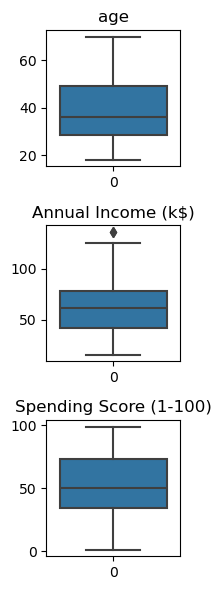

In [44]:
#Se realiza deteccion de datos atípicos
fig, axs = plt.subplots(3, figsize = (2,6))
plt1 = sns.boxplot(data['Age'], ax = axs[0])
plt2 = sns.boxplot(data['Annual Income (k$)'], ax = axs[1])
plt3 = sns.boxplot(data['Spending Score (1-100)'], ax = axs[2])
#plt4 = sns.boxplot(data['km_driven'], ax = axs[1,1])
#plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt1.set_title('age')
plt2.set_title('Annual Income (k$)')
plt3.set_title('Spending Score (1-100)')
#plt4.set_title('kilometraje')
plt.tight_layout()

In [50]:
#Datos faltantes

print('Datos faltantes en edad: ', data['Age'].isin([0]).sum())
print('Datos Faltantes en ingreso anual: ', data['Annual Income (k$)'].isin([0]).sum())
print('Datos Faltantes en puntuación: ', data['Spending Score (1-100)'].isin([0]).sum())

Datos faltantes en edad:  0
Datos Faltantes en ingreso anual:  0
Datos Faltantes en puntuación:  0


In [53]:
#Caracteristicas Relevantes

dt = data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [54]:
dt.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


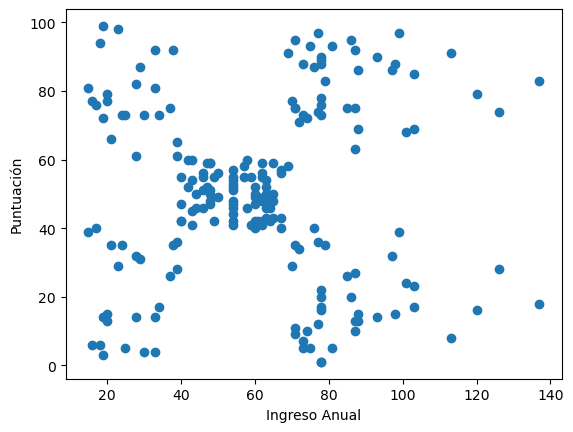

In [73]:
plt.scatter(dt['Annual Income (k$)'],dt['Spending Score (1-100)'])
plt.ylabel('Puntuación')
plt.xlabel('Ingreso Anual')
plt.show()

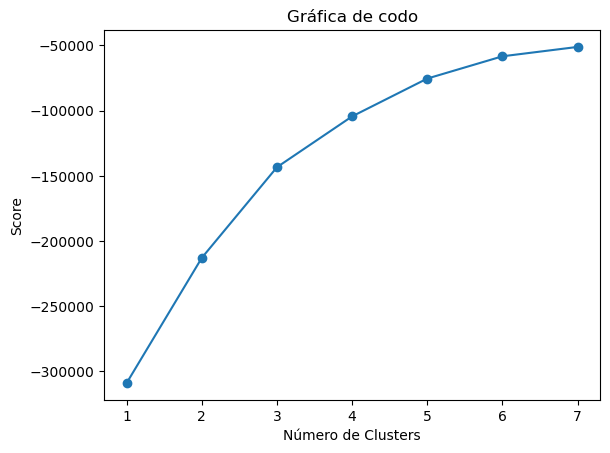

In [60]:
Nc = range(1,8)

kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(dt).score(dt) for i in range(len(kmeans))]
score

plt.plot(Nc,score,marker = 'o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de codo')
plt.show()

In [62]:
#Generación del modelo de agrupamiento del modelo con K=5

modelo = KMeans(n_clusters = 5, random_state = 0)
modelo.fit(dt)

KMeans(n_clusters=5, random_state=0)

In [67]:
#Se agrega la columna a la BD

modelo.labels_
dt["Clusters"] = modelo.labels_
print(dt)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo  Clusters
0     19                  15                      39      0         0
1     21                  15                      81      4         4
2     20                  16                       6      0         0
3     23                  16                      77      4         4
4     31                  17                      40      0         0
..   ...                 ...                     ...    ...       ...
195   35                 120                      79      1         1
196   45                 126                      28      3         3
197   32                 126                      74      1         1
198   32                 137                      18      3         3
199   30                 137                      83      1         1

[200 rows x 5 columns]


In [68]:
#Desemepeño del modeo con el coeficiente de Silhouett, indice de colinski-Harabasz y el indice de Davies Bouldin Score

#Preparación de la metrica de la columna Clusters
observ = len(dt)
X = dt.drop('Clusters', axis = 1)
clusters = dt['Clusters']

#Calculo de metricas
sil_score = silhouette_score(X,clusters)
calinski_score = calinski_harabasz_score(X,clusters)
davies_score = davies_bouldin_score(X,clusters)

print('observaciones: ',observ)
print('Coeficiente Silhouett: ',sil_score)
print('Indice de colinski-Harabasz: ',calinski_score)
print('indice de Davies Bouldin: ',davies_score)

observaciones:  200
Coeficiente Silhouett:  0.44477051471288653
Indice de colinski-Harabasz:  151.21139717094508
indice de Davies Bouldin:  0.8212285566622788


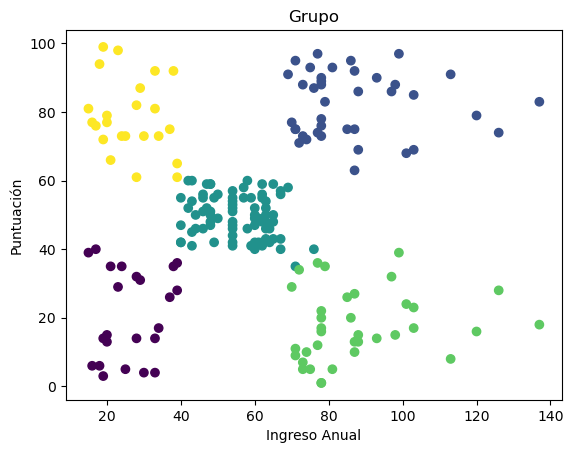

In [74]:
plt.scatter(dt['Annual Income (k$)'], dt['Spending Score (1-100)'], c = dt['Clusters'], cmap = 'viridis')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación')
plt.title('Grupo')
plt.show()
